# 1. Overview

# 2. Forecasting

## 2.1 Import Libraries

In [1]:
import pandas as pd
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

## 2.2 Define Global variables

In [2]:
input_data = 'data/weekly_data.csv'

## 2.3 Functions

## 2.4 Code

In [9]:
weekly_data = pd.read_csv(input_data, sep=';')

# Ensure the 'Date' column is in datetime format
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

# Set the 'Date' column as the index to make it a DatetimeIndex
weekly_data.set_index('Date', inplace=True)

# Explicitly set the frequency of the Date index
weekly_data = weekly_data.asfreq('W')

weekly_data.head()

,Close
Date,
2008-01-06,18.874004
2008-01-13,18.566458
2008-01-20,17.363014
2008-01-27,18.405998
2008-02-03,18.506289


### 2.4.1 Train test split

In [10]:
train_data = weekly_data[:-8]
train_data

,Close
Date,
2008-01-06,18.874004
2008-01-13,18.566458
2008-01-20,17.363014
2008-01-27,18.405998
2008-02-03,18.506289
...,...
2024-07-28,886.747009
2024-08-04,860.239990
2024-08-11,860.549988


In [11]:
test_data = weekly_data[-8:]
test_data

,Close
Date,
2024-09-01,889.880005
2024-09-08,795.599976
2024-09-15,800.169983
2024-09-22,795.280029
2024-09-29,841.539978
2024-10-06,833.000000
2024-10-13,840.690002
2024-10-20,706.975006


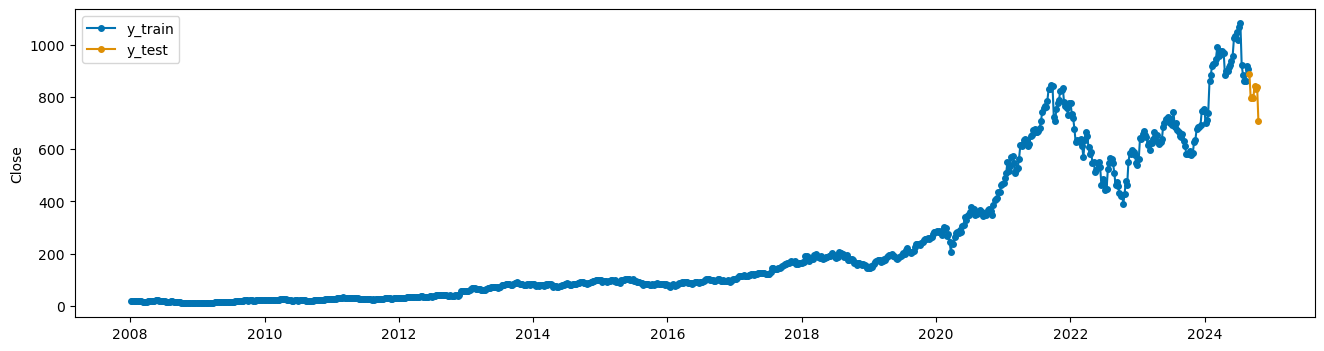

In [12]:
plot_series(train_data, test_data, labels=["y_train", "y_test"]);

### 2.4.2 Naive forecaster

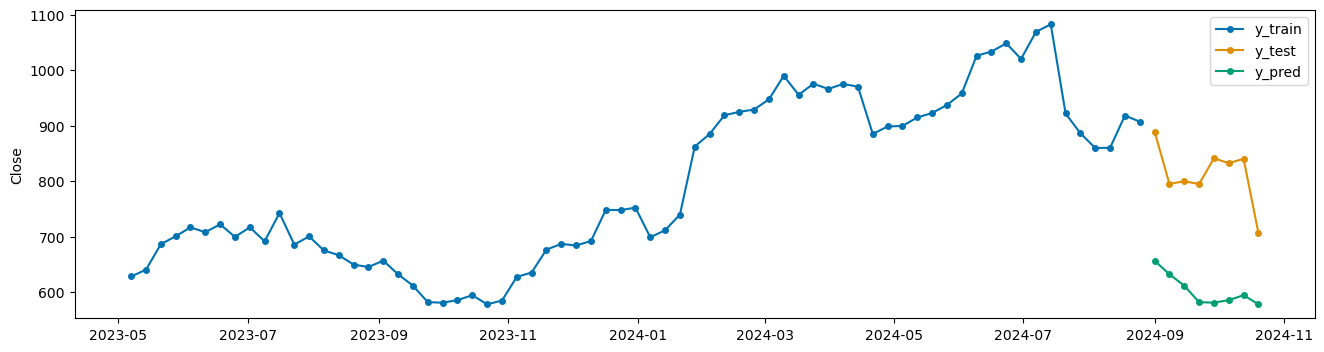

In [18]:
# Initialize the Naive Forecaster (strategy = 'last' means it will use the last value)
naive_forecaster = NaiveForecaster(strategy="last", sp=52)

# Fit the model to the training data
naive_forecaster.fit(train_data)

# Make predictions on the test set
y_pred = naive_forecaster.predict(fh=[i+1 for i in range(len(test_data))])

# Plot the training, test data, and predictions
plot_series(train_data[800:], test_data, y_pred, labels=["y_train", "y_test", "y_pred"]);
